In [2]:
import sys
sys.path.append('..')

import antools

import pandas as pd

file_name = "circhorn10ghz.xlsx"

## Reading the Relevant Data Points

`antools.data_point` extracts the relevant data points out of a file or DataFrame

Here we extract it from an excel file:

In [3]:

r, phi = antools.data_points(
    file_name,  # You can read in the DataPoints directliy from A file
    lock=("Theta", 45),  # Which variable will be locked 
    polarization=["E-Theta"],  # Here we just want one polarization
    freq="10000 MHz",  # This must also be the sheetname in the excel file
)

pd.DataFrame(zip(r, phi))  # 

,0,1
0,3.764939e-07,0.0
1,1.418265e-03,1.0
2,2.834861e-03,2.0
3,4.248243e-03,3.0
4,5.656817e-03,4.0
...,...,...
356,5.656817e-03,356.0
357,4.248243e-03,357.0
358,2.834861e-03,358.0
359,1.418265e-03,359.0


Storing the data in a DataFrame first can increase speed on subsequent calls

In [4]:
# You can also store the data in a dataframe first to reduce loading time
df = pd.read_excel(file_name, sheet_name="10000 MHz")

In [5]:
r1, r2, phi = antools.data_points(
    df,
    lock=("Theta", 45),  # Which variable will be locked 
    polarization=["E-Theta", "E-Phi"],  # Now we want two Polarizations this is the default behavior
)

pd.DataFrame(zip(r1, r2, phi))

,0,1,2
0,3.764939e-07,0.164069,0.0
1,1.418265e-03,0.164059,1.0
2,2.834861e-03,0.164026,2.0
3,4.248243e-03,0.163971,3.0
4,5.656817e-03,0.163894,4.0
...,...,...,...
356,5.656817e-03,0.163894,356.0
357,4.248243e-03,0.163971,357.0
358,2.834861e-03,0.164026,358.0
359,1.418265e-03,0.164059,359.0


## Plotting

antools.Plotter is a thin wraper around matplotlib that sets up a polar plot and the apropiate labels

If you allrady have your data points and want to control the title and labels use `antools.Plotter.plot` 

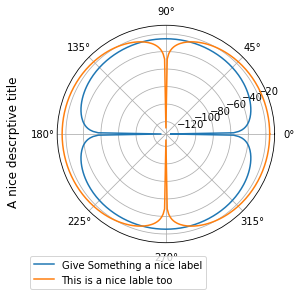

In [6]:
antools.Plotter.plot(
    [(r1,phi),  (r2, phi)], # You can plot multiple variables
    title="A nice descrptive title",
    label=['Give Something a nice label', 'This is a nice lable too'],  # The lable for each plot
    db= True  # Connvert values to db for plotting, this is the default behavior
)

To rapidly create nicely labled plots out of a file or DataFrame use `antools.Plotter.io_plot` this is the main purpose of this module.


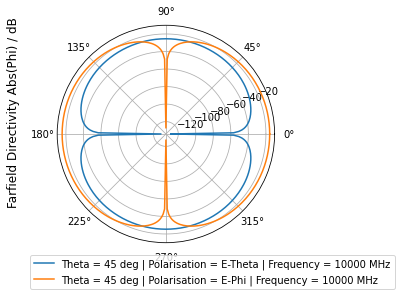

In [7]:
# io_plot takes the same arguments as data_points and draws a plot out of them
# db as in dezibel conversion can also be specified (default True) 

antools.Plotter.io_plot(
    df,  # This could also be a filename
    lock=("Theta", 45),
    freq="10000 MHz",  # This is only needed for the label when using a file_name as input this must also be the sheet name
)

You can constrain the plot results to only view usable results

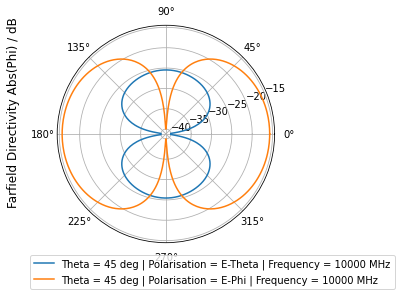

In [8]:
antools.Plotter.io_plot(
    df,  # This could also be a filename
    lock=("Theta", 45),
    freq="10000 MHz",  # This is only needed for the label when using a file_name as input this must also be the sheet name
    constr_min=-40
)